In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle



In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [33]:
df= pd.read_csv("clean_dataset.csv")

In [34]:
#Checking for class imbalance
df['Target_Default_Status'].value_counts()

0    23364
1      664
Name: Target_Default_Status, dtype: int64

In [35]:
df.columns

Index(['LIMIT_BAL', 'JOB_TYPE', 'SEX_UNKNOWN', 'SEX_female', 'SEX_male',
       'EDUCATION_UNKNOWN', 'EDUCATION_graduate school',
       'EDUCATION_high school diploma', 'EDUCATION_other',
       'EDUCATION_post graduate', 'EDUCATION_university', 'MARRIAGE_UNKNOWN',
       'MARRIAGE_divorce', 'MARRIAGE_married', 'MARRIAGE_other',
       'MARRIAGE_single', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Target_Default_Status'],
      dtype='object')

In [36]:
#Defining X and y
X=df.drop(['Target_Default_Status'],axis=1)
y=df['Target_Default_Status']

In [37]:
#This function is used for:
#1) Train Test splitting the dataset & model fitting
#2) Hyperparmeter tuning the model using RandomizedSearchCV, 
#3) Generating the classfiication report and Confusion Matrix
#4) Storing the model state as a pickle file
#5) Getting the best set of Hyperparameters

#6) Getting Classification Report for Training set
#7) Getting Classification Report for Testing set

#8) Getting Confusion Matrix for Training set
#9) Getting Confusion Matrix for Testing set

#10) Getting ROC Area Under the Curve Score for Training set
#11) Getting ROC Area Under the Curve Score for Testing set
#12) Plotting ROC Curve

#13) Getting Precision-Recall Curve Area Under the Curve Score for Training set
#14) Getting Precision-Recall Curve  Area Under the Curve Score for Testing set
#15) Plotting Precision-Recall Curve  
def Model_Driver_Function(X,Y,algo_name,algorithm,gridSearchParams,cv,n_iter):

    #Setting the random seed to 101
    np.random.seed(101)
    #Train test splitting the data in 70:30 ratio
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)
    

    #Using Grid serach for hyper-parameter tuning the model
    RandomizedSearchCV_grid = RandomizedSearchCV(
        estimator=algorithm,
        param_distributions=gridSearchParams,
        cv=cv, scoring='f1', verbose=1, n_jobs=-1,n_iter=n_iter,random_state=101)
    

    #Fitting the model
    RandomizedSearch_result = RandomizedSearchCV_grid.fit(x_train, y_train)


    #getting best parameters
    best_params = RandomizedSearch_result.best_params_

    #Getting the prediction against the Test Set
    prediction_test = RandomizedSearch_result.predict(x_test)

    #Getting the prediction against the Train Set
    prediction_train = RandomizedSearch_result.predict(x_train)

    #Getting the confusion matrix for training set
    cm_train = confusion_matrix(y_train, prediction_train)

    #Getting the confusion matrix for testing set
    cm_test = confusion_matrix(y_test, prediction_test)

    #Storing the model state into a pickle file
    pickle.dump(RandomizedSearch_result,open(algo_name,'wb'))


    print('\n\n')
    print('==============================================================================================')
    print('Best Model Hyper-parameters :',best_params)


    print('\n\n')
    print('==============================================================================================')
    print('Classification Report For Training set : \n',classification_report(y_train,prediction_train))

    print('\n\n')
    print('==============================================================================================')
    print('Classification Report For Testing set : \n',classification_report(y_test,prediction_test))

    print('\n\n')
    print('==============================================================================================')
    print('Confusion Matrix for Training Set :\n', cm_train)

    print('\n\n')
    print('==============================================================================================')
    print('Confusion Matrix for Testing Set :\n', cm_test)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Training set
    model_auc_train = roc_auc_score(y_train, prediction_train)
    print('ROC Area Under the Curve Score for Training set:', model_auc_train)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Testing set
    model_auc_test = roc_auc_score(y_test, prediction_test)
    print('ROC Area Under the Curve Score for Testing set:', model_auc_test)

    print('\n\n')
    print('==============================================================================================')
    # calculating the ROC curves
    Model_False_Positive_Rate, Model_True_Positive_Rate, _ = roc_curve(y_test, prediction_test)

    print('\n\n')
    print('==============================================================================================')
    # plotting the roc curve for the model
    print("ROC Curve")
    plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No SKill')
    label_string=algo_name+'(AUC = %0.3f)' % model_auc_test
    plt.plot(Model_False_Positive_Rate, Model_True_Positive_Rate, marker='.', label=label_string, color='orange')

    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.legend()
    plt.show()

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Training set

    # calculating the Precision and Recall scores for different thresholds
    model_precision_train, model_recall_train, model_thresholds_train = precision_recall_curve(y_train, prediction_train)
    # calculate scores
    model_pr_auc_train = auc(model_recall_train, model_precision_train)
    print('Precision-Recall Area Under the Curve Score for Training set:', model_pr_auc_train)

    print('\n\n')
    print('==============================================================================================')
    # calculating Area Under the Curve scores for Testing set

    # calculating the Precision and Recall scores for different thresholds
    model_precision_test, model_recall_test, model_thresholds_test = precision_recall_curve(y_test, prediction_test)
    # calculate scores
    model_pr_auc_test= auc(model_recall_test, model_precision_test)
    print('Precision-Recall Area Under the Curve Score for Testing set:', model_pr_auc_test)

    print('\n\n')
    print('==============================================================================================')
    # plotting the roc curve for the model
    print("Precision- Recall Curve")
    plt.figure(figsize=(12,8))
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], color='darkblue', linestyle='--',label='No SKill')
    label_string=algo_name+'(AUC = %0.3f)' % model_pr_auc_test
    
    plt.plot(model_recall_test, model_precision_test, marker='.', label=label_string, color='orange')

    plt.xlabel('Recall',fontsize=15)
    plt.ylabel('Precision',fontsize=15)
    plt.legend()
    plt.show()


# Developing Models Using Over Sampling
***
Developing models using the SMOTE Over sampling balancing technique for balancing the dataset

In [38]:
from imblearn.over_sampling import SMOTE

#Over Smapling the dataset
OverSample =SMOTE(random_state=101)
X_OverSample , y_OverSample = OverSample.fit_resample(X,y)

In [39]:
#CHekcing the values in the Target class now
pd.Series(y_OverSample).value_counts()

0    23364
1    23364
Name: Target_Default_Status, dtype: int64

##Using Random Forrest Classifier

Fitting 5 folds for each of 35 candidates, totalling 175 fits



Best Model Hyper-parameters : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}



Classification Report For Training set : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     16358
           1       0.94      0.95      0.94     16351

    accuracy                           0.94     32709
   macro avg       0.94      0.94      0.94     32709
weighted avg       0.94      0.94      0.94     32709




Classification Report For Testing set : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7006
           1       0.93      0.93      0.93      7013

    accuracy                           0.93     14019
   macro avg       0.93      0.93      0.93     14019
weighted avg       0.93      0.93      0.93     14019




Confusion Matrix for Training Set :
 [[15300  1058]
 [  816 15535]]





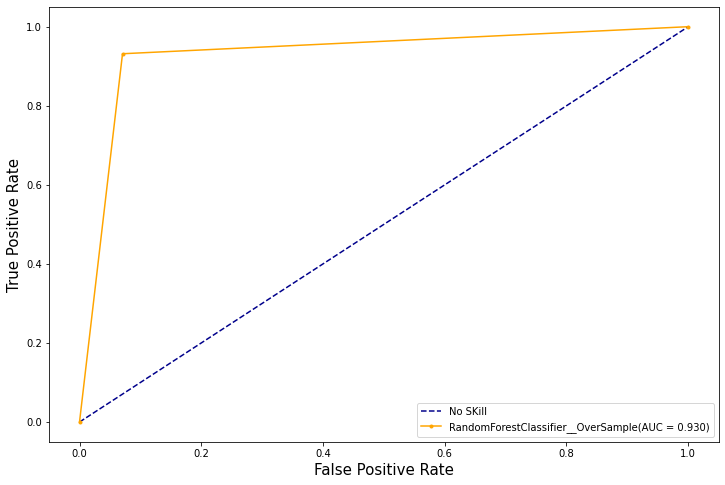




Precision-Recall Area Under the Curve Score for Training set: 0.9556401151851005



Precision-Recall Area Under the Curve Score for Testing set: 0.9476811867742737



Precision- Recall Curve


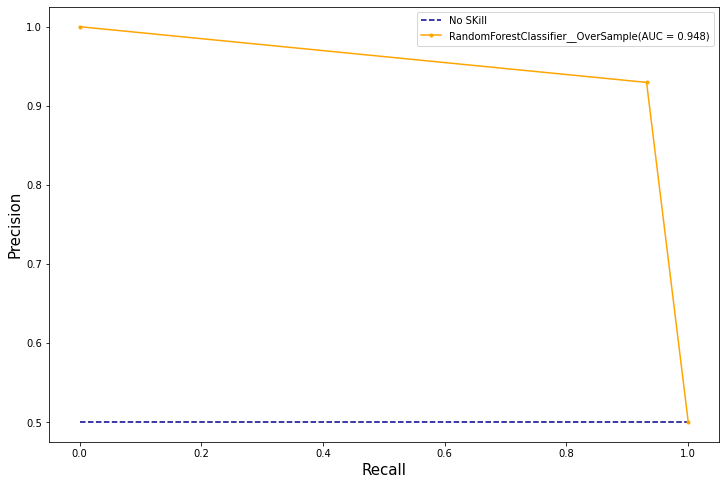

In [40]:
#Defining Hyper-parametrs for the Random Forrest Classifier
param ={'n_estimators': [100, 250, 300],
 'max_depth': [5, 7, 10], 
 'min_samples_split': [2, 5], 
 'min_samples_leaf': [1, 2, 4]}

Model_Driver_Function(X_OverSample, y_OverSample,'RandomForestClassifier__OverSample',RandomForestClassifier(n_jobs=-1),param,cv=5,n_iter=35)

## Using XGBoost Classifier

Fitting 5 folds for each of 75 candidates, totalling 375 fits



Best Model Hyper-parameters : {'reg_lambda': 1, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0}



Classification Report For Training set : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     16358
           1       1.00      0.99      1.00     16351

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709




Classification Report For Testing set : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7006
           1       0.99      0.98      0.99      7013

    accuracy                           0.99     14019
   macro avg       0.99      0.99      0.99     14019
weighted avg       0.99      0.99      0.99     14019




Confusion Matrix for Training Set :
 [[16356     2]
 [  158 16193]]


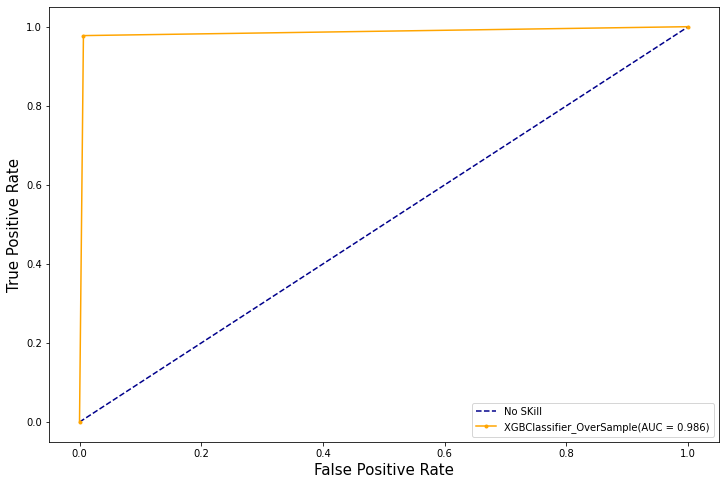




Precision-Recall Area Under the Curve Score for Training set: 0.997521981167296



Precision-Recall Area Under the Curve Score for Testing set: 0.9911095458394248



Precision- Recall Curve


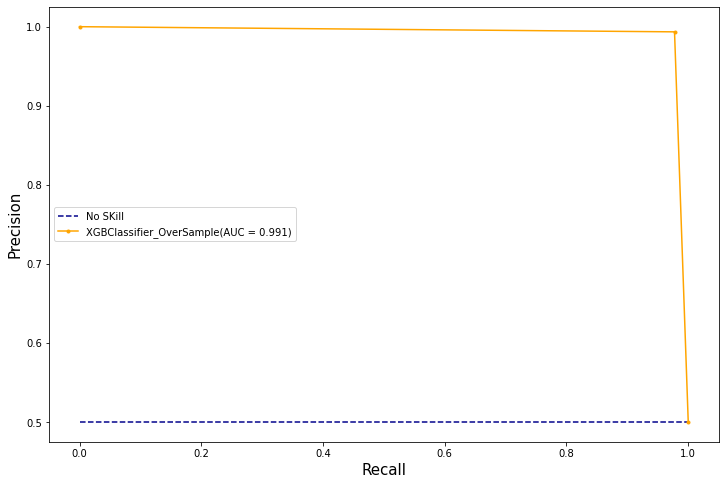

In [45]:
#Defining Hyper-parametrs for the XGBoost Classifier
param ={
    "learning_rate": [0.1, 0.01],
    "max_depth": [3,5,7],
    "n_estimators": [100, 200, 250],
    "reg_lambda": [1, 2],
    "gamma": [0, 0.1, 0.3],
}

Model_Driver_Function(X_OverSample, y_OverSample,'XGBClassifier_OverSample',XGBClassifier(tree_method = "gpu_hist", n_jobs=-1, eval_metric=['auc']),param,cv=5,n_iter=75)

## Using LightGBM Classifier

Fitting 5 folds for each of 25 candidates, totalling 125 fits



Best Model Hyper-parameters : {'num_leaves': 10, 'num_iterations': 300, 'max_depth': 7, 'learning_rate': 0.1}



Classification Report For Training set : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16358
           1       1.00      0.97      0.98     16351

    accuracy                           0.98     32709
   macro avg       0.98      0.98      0.98     32709
weighted avg       0.98      0.98      0.98     32709




Classification Report For Testing set : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7006
           1       0.99      0.97      0.98      7013

    accuracy                           0.98     14019
   macro avg       0.98      0.98      0.98     14019
weighted avg       0.98      0.98      0.98     14019




Confusion Matrix for Training Set :
 [[16332    26]
 [  530 15821]]



Confus

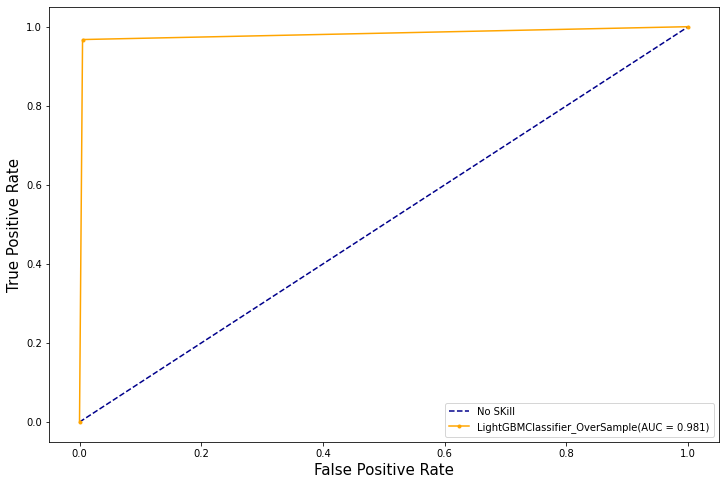




Precision-Recall Area Under the Curve Score for Training set: 0.9910744413332229



Precision-Recall Area Under the Curve Score for Testing set: 0.9893103132425132



Precision- Recall Curve


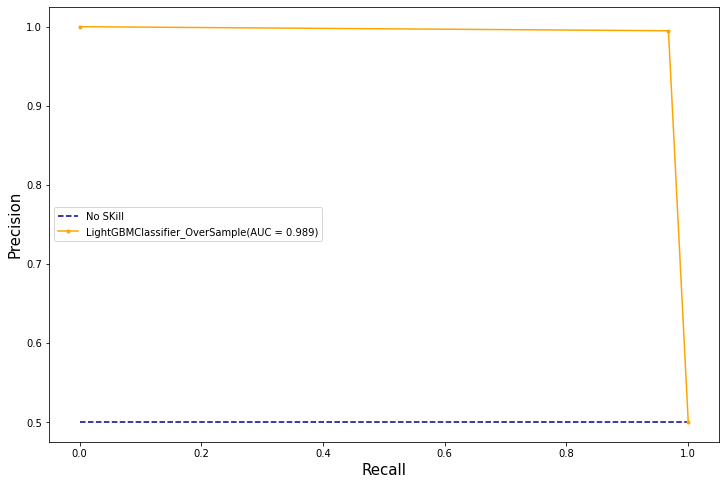

In [46]:
#Defining Hyper-parametrs for the LightGBM Classifier
param ={
  'num_iterations': [100, 200, 300],
  'learning_rate':[0.1, 0.01],
  'num_leaves':[10,15],
  'max_depth' :[3,5,7],
  
}
Model_Driver_Function(X_OverSample, y_OverSample,'LightGBMClassifier_OverSample',LGBMClassifier(),param,cv=5,n_iter=25)